# Denoise Experiment

In [1]:
from bcd.preprocess.image.method.denoise import *
from bcd.preprocess.image.experiment.denoise import DenoiseExperiment, RandomNoise
from bcd.container import BCDContainer
from bcd.config import Config
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
Config.set_log_level('INFO')
Config.set_mode('exp')

In [3]:
container = BCDContainer()
container.init_resources()
container.wire(
    packages=[
        "bcd.dal.repo",  
        "bcd.dal.io",
        "bcd.preprocess.image.experiment"
    ]
)

## Setup Experiment

In [ ]:
gn = RandomNoise(mode='gaussian') 
snp = RandomNoise(mode='s&p')
spk = RandomNoise(mode='speckle')

exp = DenoiseExperiment(stage_in=0, stage_out=1)
exp.add_random_noise_gen(random_noise_gen=gn)
exp.add_random_noise_gen(random_noise_gen=snp)
exp.add_random_noise_gen(random_noise_gen=spk)


## Spatial Domain Filters
### Linear Filters

#### Mean Filter

In [ ]:
exp.run(method=MeanFilter, params={'kernel': [3,5,7]})

[12/11/2023 10:27:52 AM] [INFO] [MySQLDatabase] [connect] : Database is not started. Starting database...
[sudo] password for john: 

\nStarting MySQL...
 * Starting MySQL database server mysqld


su: warning: cannot change directory to /nonexistent: No such file or directory


   ...done.


<Axes: xlabel='method', ylabel='mse'>

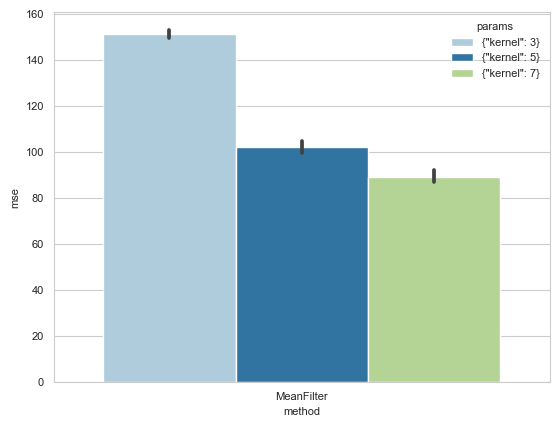

In [4]:
eval_repo = container.dal.eval_repo()
evals = eval_repo.get()
scores = evals.loc[evals['method'] == 'MeanFilter']
sns.barplot(data=scores, x='method', y='mse', hue='params')

<Axes: xlabel='method', ylabel='psnr'>

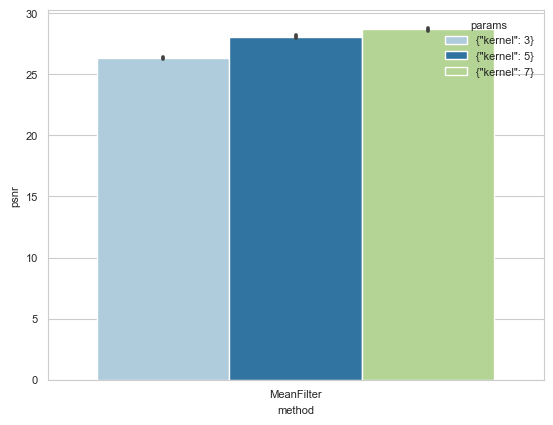

In [5]:
sns.barplot(data=scores, x='method', y='psnr', hue='params')

<Axes: xlabel='method', ylabel='ssim'>

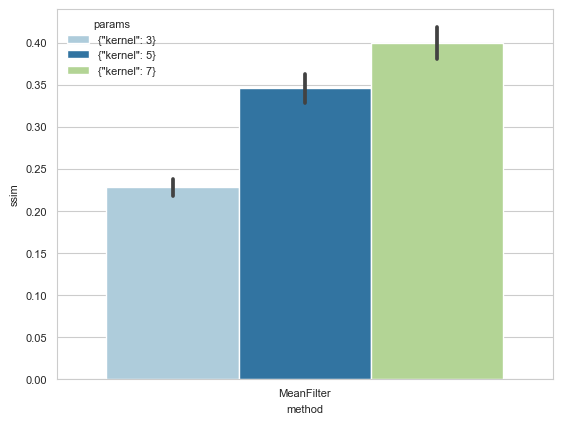

In [6]:
sns.barplot(data=scores, x='method', y='ssim', hue='params')

#### Gaussian filter

In [ ]:
exp.run(method=GaussianFilter, params={'kernel': [3,5,7]})

<Axes: xlabel='method', ylabel='mse'>

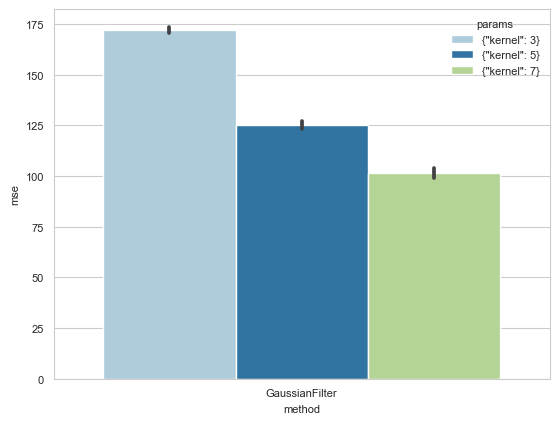

In [7]:
evals = eval_repo.get()
scores = evals.loc[evals['method'] == 'GaussianFilter']
sns.barplot(data=scores, x='method', y='mse', hue='params')



<Axes: xlabel='method', ylabel='psnr'>

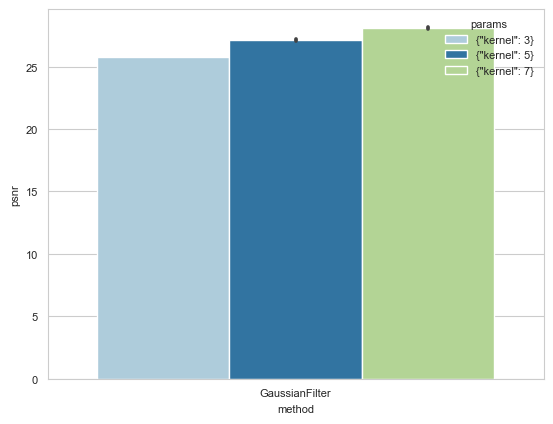

In [8]:
sns.barplot(data=scores, x='method', y='psnr', hue='params')

<Axes: xlabel='method', ylabel='ssim'>

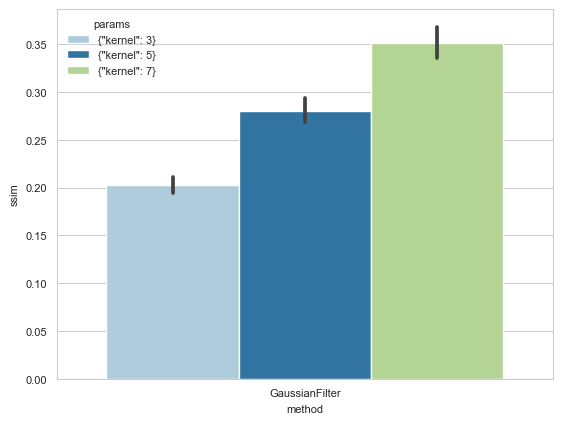

In [9]:
sns.barplot(data=scores, x='method', y='ssim', hue='params')

### Non-Linear Filters
#### Median Filter

In [ ]:
exp.run(method=MedianFilter, params={'kernel': [3,5,7]})

<Axes: xlabel='method', ylabel='mse'>

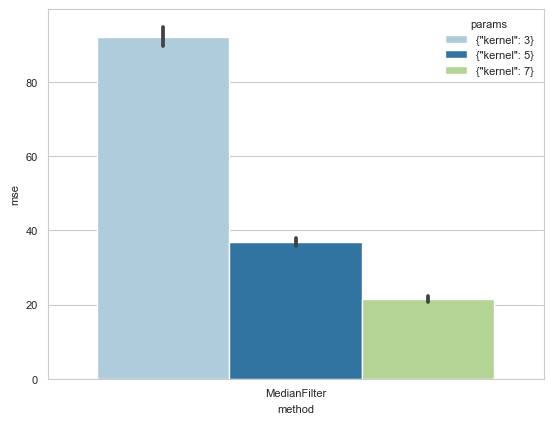

In [10]:
evals = eval_repo.get()
scores = evals.loc[evals['method'] == 'MedianFilter']
sns.barplot(data=scores, x='method', y='mse', hue='params')



<Axes: xlabel='method', ylabel='psnr'>

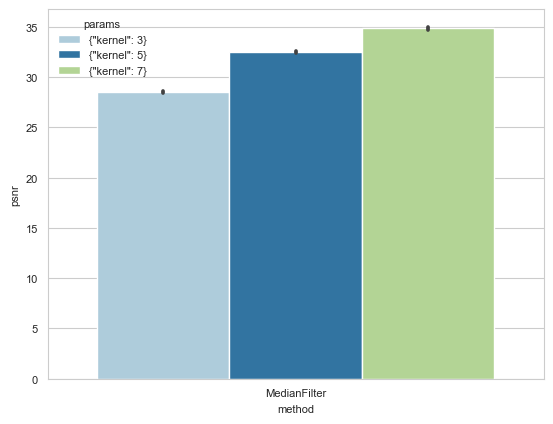

In [11]:
sns.barplot(data=scores, x='method', y='psnr', hue='params')

<Axes: xlabel='method', ylabel='ssim'>

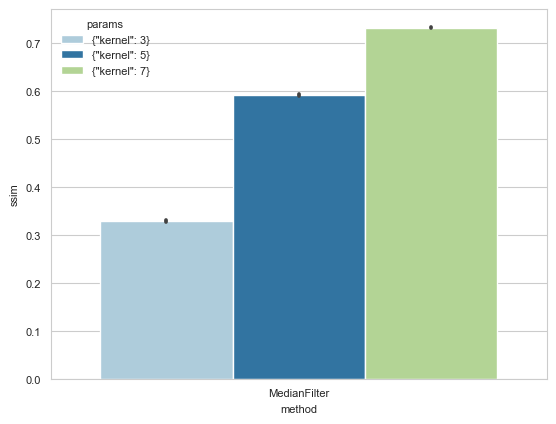

In [12]:
sns.barplot(data=scores, x='method', y='ssim', hue='params')

#### Bilateral Filter

In [ ]:
exp.run(method=BilateralFilter, params={'sigma_color_factor': [0.5,1,0, 1.5], 'sigma_space_factor': [1]})

In [ ]:
evals = eval_repo.get()
scores = evals.loc[evals['method'] == 'BilateralFilter']
sns.barplot(data=scores, x='method', y='mse', hue='params')

In [ ]:
sns.barplot(data=scores, x='method', y='psnr', hue='params')

In [ ]:
sns.barplot(data=scores, x='method', y='ssim', hue='params')

#### Non-Local Means

In [14]:
exp.run(method=NLMeansFilter, params={'h': [3, 5, 10]})

batch: 100%|██████████| 6/6 [49:50<00:00, 498.47s/it]


## Frequency Domain Filters
### Butterworth Filter

In [ ]:
exp.run(method=ButterworthFilter, params={'order': [10], 'cutoff': [0.25, 0.5, 0.75]})

batch:   0%|          | 0/6 [00:00<?, ?it/s]

batch:   0%|          | 0/6 [00:07<?, ?it/s]


ValueError: Since image dtype is floating point, you must specify the data_range parameter. Please read the documentation carefully (including the note). It is recommended that you always specify the data_range anyway.

In [ ]:
evals = eval_repo.get()
scores = evals.loc[evals['method'] == 'ButterworthFilter']
sns.barplot(data=scores, x='method', y='mse', hue='params')



In [ ]:
sns.barplot(data=scores, x='method', y='psnr', hue='params')

In [ ]:
sns.barplot(data=scores, x='method', y='ssim', hue='params')

### Wavelet Filter

In [ ]:
exp.run(method=WaveletFilter, params={'wavelet': ['haar']})

In [ ]:
evals = eval_repo.get()
scores = evals.loc[evals['method'] == 'WaveletFilter']
sns.barplot(data=scores, x='method', y='mse', hue='params')



In [ ]:
sns.barplot(data=scores, x='method', y='psnr', hue='params')

In [ ]:
sns.barplot(data=scores, x='method', y='ssim', hue='params')